### Model Diagnostics in Python

In this notebook, we will be trying out some of the model diagnostics.
First let's read in the necessary libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
)
from sklearn.model_selection import train_test_split

np.random.seed(42)

df = pd.read_csv("data/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


`1.` Change prestige to dummy variable columns that are added to `df`.  Then divide your data into training and test data.  Create your test set as 20% of the data, and use a random state of 0.  Your response should be the `admit` column.  [Here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) are the docs, which can also find with a quick google search if you get stuck.

In [2]:
df[["prest_1", "prest_2", "prest_3", "prest_4"]] = pd.get_dummies(df["prestige"])

X = df.drop(["admit", "prestige", "prest_1"], axis=1)
y = df["admit"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

`2.` Now use [sklearn's Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit a logistic model using `gre`, `gpa`, and 3 of your `prestige` dummy variables.  For now, fit the logistic regression model without changing any of the hyperparameters.  

The usual steps are:
* Instantiate
* Fit (on train)
* Predict (on test)
* Score (compare predict to test)

As a first score, obtain the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).  Then answer the first question below about how well your model performed on the test data.

In [3]:
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)
confusion_matrix(y_test, preds)

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[56,  0],
       [20,  4]])

`3.` Now, try out a few additional metrics: [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) are all popular metrics.  You could compute these directly from the confusion matrix, but you can also use these built in functions in sklearn.

Another very popular set of metrics are [ROC curves and AUC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).  These actually use the probability from the logistic regression models, and not just the label.  [This](http://blog.yhat.com/posts/roc-curves.html) is also a great resource for understanding ROC curves and AUC.

Try out these metrics to answer the second quiz question below.  I also provided the ROC plot below.  The ideal case is for this to shoot all the way to the upper left hand corner.  Again, these are discussed in more detail in the Machine Learning Udacity program.

In [4]:
precision_score(y_test, preds)

1.0

In [5]:
recall_score(y_test, preds)

0.16666666666666666

In [6]:
accuracy_score(y_test, preds)

0.75

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


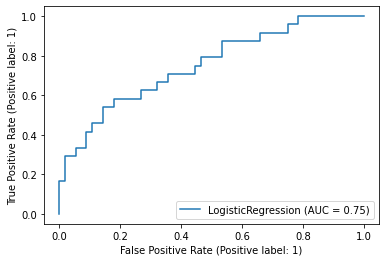

In [10]:
metrics.plot_roc_curve(log_mod, X_test, y_test)